<a href="https://colab.research.google.com/github/2303A52465/23CSBTB50/blob/main/AIML_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('Outcome', axis=1))
scaled_features = scaler.transform(df.drop('Outcome', axis=1))

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Outcome'],test_size=0.30)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[116  28]
 [ 43  44]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       144
           1       0.61      0.51      0.55        87

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.68      0.69      0.69       231



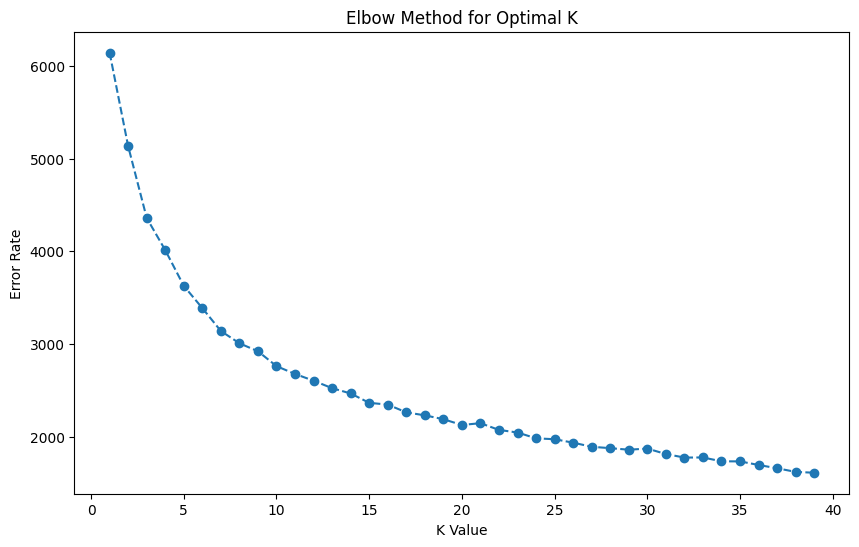

In [ ]:

from sklearn.cluster import KMeans

error_rate = []

for i in range(1,40):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_feat)
    error_rate.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', linestyle='--')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 10
Confusion Matrix
[[130  14]
 [ 55  32]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       144
           1       0.70      0.37      0.48        87

    accuracy                           0.70       231
   macro avg       0.70      0.64      0.64       231
weighted avg       0.70      0.70      0.67       231

